In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [10]:
df1 = pd.read_csv('AAPL.csv',parse_dates=True)
df2 = pd.read_csv('Book1.csv',parse_dates=True, sep = ",")
df3 = pd.merge(df1, df2, how='inner', left_on = 'Date' , right_on = 'date')

In [11]:
#print(df1)
#print(df2)
print(df3)

           Date        Open        High         Low       Close   Adj Close  \
0    2020-10-26  114.010002  116.550003  112.879997  115.050003  114.314751   
1    2020-10-27  115.489998  117.279999  114.540001  116.599998  115.854843   
2    2020-10-28  115.050003  115.430000  111.099998  111.199997  110.489349   
3    2020-10-29  112.370003  116.930000  112.199997  115.320000  114.583023   
4    2020-10-30  111.059998  111.989998  107.720001  108.860001  108.164307   
..          ...         ...         ...         ...         ...         ...   
247  2021-10-19  147.009995  149.169998  146.550003  148.759995  148.759995   
248  2021-10-20  148.699997  149.750000  148.119995  149.259995  149.259995   
249  2021-10-21  148.809998  149.639999  147.869995  149.479996  149.479996   
250  2021-10-22  149.690002  150.179993  148.639999  148.690002  148.690002   
251  2021-10-25  148.679993  149.369995  147.619995  148.639999  148.639999   

        Volume        date     cases  deaths  
0   

In [12]:
x = np.mean(df3['cases'])
y = np.mean(df3['Close'])
print(x)
print(y)

29831991.468253966
133.23488075000006


In [13]:
df3['x_var'] = (df3['cases'] - x)**2

In [14]:
df3['xy_cov'] = (df3['cases'] - x) * (df3['Close'] -  y)

In [15]:
beta = df3['xy_cov'].sum() / df3['x_var'].sum()
alpha = y - beta * x
print(alpha)
print(beta)

107.40498159007264
8.65845620377526e-07


In [16]:
y_pred = alpha +beta * df3['cases']

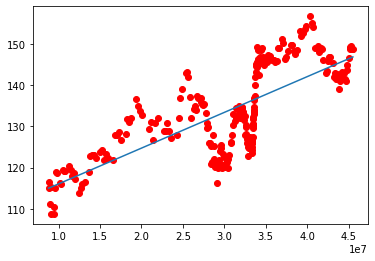

In [20]:
plt.plot(df3['cases'], y_pred)
plt.scatter(df3['cases'],df3['Close'] , color='r')
plt.show()